In [1]:
import numpy as np
import matplotlib.pyplot as plt
from abc import ABC, abstractmethod
import os

import warnings
warnings.filterwarnings('ignore')



## Class Files

In [1]:
from classes import Layer, Linear, Sequential, Sigmoid, Tanh, ReLU, BinaryCrossEntropyLoss



## XOR Dataset

(4, 2)
(4, 1)


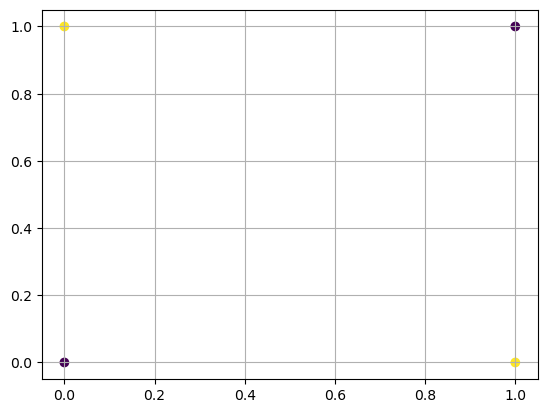

In [3]:
# Define the XOR dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])  # Inputs
targets = np.array([[0], [1], [1], [0]])             # Outputs (labels)


print(X.shape)
print(targets.shape)


fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(X[:, 0], X[:, 1], c=targets)
ax.grid(True)



### XOR model with Sigmoid Activation

In [4]:
xor_model = Sequential()
xor_model.add(Linear(2,2))
xor_model.add(Sigmoid())
xor_model.add(Linear(2,1))
xor_model.add(Sigmoid())

print(xor_model)


Sequential Model:
Layer 1: Linear
  Weights: (2, 2)
  Bias: (2,)
Layer 2: Sigmoid
Layer 3: Linear
  Weights: (1, 2)
  Bias: (1,)
Layer 4: Sigmoid



#### Train XOR model

In [5]:
def train_model(model, X, y, learning_rate=0.01, epochs=10000, verbose=False):

    loss_metric = BinaryCrossEntropyLoss()

    epoch_loss = []

    for epoch in range(epochs):
        # Forward pass
        y_pred = model.forward(X)

        # Compute loss
        loss = loss_metric.forward(y_pred, y)

        # Backward pass
        gradients = loss_metric.backward()

        model.backward(gradients)

        # Update weights
        for layer in model.layers:
            if hasattr(layer, 'weights'):
                layer.weights -= learning_rate * layer.grad_weights
                layer.bias -= learning_rate * layer.grad_bias


    return model


In [6]:
xor_model = train_model(xor_model, X,targets)

print(xor_model)


Sequential Model:
Layer 1: Linear
  Weights: (2, 2)
  Bias: (2,)
Layer 2: Sigmoid
Layer 3: Linear
  Weights: (1, 2)
  Bias: (1,)
Layer 4: Sigmoid



#### Evaluating XOR model

In [7]:


y_pred = xor_model.forward(X)
y_pred_class = (y_pred >= 0.5).astype(int)


# Print predictions and ground truth
print("Input:\n", X)
print("Predicted Output:\n", y_pred)

print("Classified Output (Thresholded):\n", y_pred_class)
print("Ground Truth:\n", targets)


# Compute accuracy
accuracy = np.mean(y_pred_class == targets) * 100
print(f"Accuracy: {accuracy:.2f}%")


Input:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Output:
 [[0.11595409]
 [0.82691358]
 [0.91845026]
 [0.09407252]]
Classified Output (Thresholded):
 [[0]
 [1]
 [1]
 [0]]
Ground Truth:
 [[0]
 [1]
 [1]
 [0]]
Accuracy: 100.00%


#### Saving model weights

In [8]:
xor_model.save('XOR_solved.w')

#### Decision Boundaries 

In [9]:

def calc_decision_boundary(weights):
    x = -weights[0] / weights[1]
    y = -weights[0] / weights[2]
    m = -y / x
    return np.array([m, y])

def gen_boundary_points(weights, m, b):
    # If the slope is undefined, it is vertical.
    if weights[2] != 0:
        x = np.linspace(-5, 5, 100)
        y = m * x + b
    else:
        x = np.zeros(100)
        y = np.linspace(-5, 5, 100) + b

    return x, y

In [10]:
# Extract weights and biases
hidden_layer = xor_model.layers[0]  # First Linear layer
output_layer = xor_model.layers[2]  # Second Linear layer

# Get weights and biases for hidden and output layers
print("------Node 1------\n")
hidden_weights = hidden_layer.weights
print(hidden_weights)

hidden_biases = hidden_layer.bias
print(hidden_biases)

print("\n-----Node 2-------\n")
output_weights = output_layer.weights
print(output_weights)

print("------")
output_biases = output_layer.bias
print(output_biases)


------Node 1------

[[ 4.94268822 -5.14661454]
 [ 4.05769988 -3.76108742]]
[-2.89656449  1.77869006]

-----Node 2-------

[[ 6.25077212 -5.3375513 ]]
------
[2.20808425]


In [11]:
# Extract weights and biases
hidden_weights = xor_model.layers[0].weights  # Layer 1 weights
hidden_bias = xor_model.layers[0].bias       # Layer 1 bias

hidden_params = np.hstack((hidden_bias.reshape(-1, 1), hidden_weights))

print(hidden_params)

# Weight matrix has shape [w0 w1 w2]

[[-2.89656449  4.94268822 -5.14661454]
 [ 1.77869006  4.05769988 -3.76108742]]


#### Displaying Decision Boundary

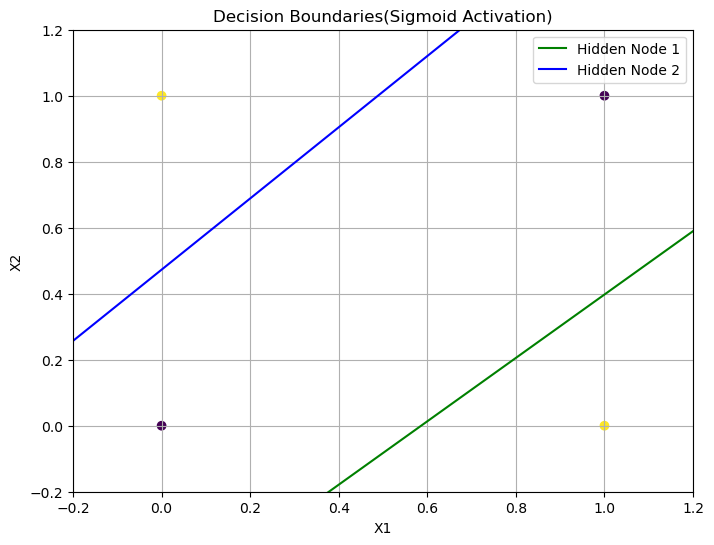

In [12]:

# Calculate decision boundary for each hidden node
hidden_m0, hidden_b0 = calc_decision_boundary(hidden_params[0])
hidden_x0, hidden_y0 = gen_boundary_points(hidden_params[0], hidden_m0, hidden_b0)
hidden_m1, hidden_b1 = calc_decision_boundary(hidden_params[1])
hidden_x1, hidden_y1 = gen_boundary_points(hidden_params[1], hidden_m1, hidden_b1)


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Visualize input space and decision boundaries
plt.figure(figsize=(8, 6))
plt.title("Decision Boundaries(Sigmoid Activation)")
plt.plot(hidden_x0, hidden_y0, c='g', label="Hidden Node 1")
plt.plot(hidden_x1, hidden_y1, c='b', label="Hidden Node 2")
plt.scatter(X[:, 0], X[:, 1], c=y.flatten())
plt.legend()
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()


### XOR model with Tanh Activation

In [2]:
xor_model_t = Sequential()
xor_model_t.add(Linear(2,2))
xor_model_t.add(Tanh())
xor_model_t.add(Linear(2,1))
xor_model_t.add(Sigmoid())

print(xor_model_t)

Sequential Model:
Layer 1: Linear
  Weights: (2, 2)
  Bias: (2,)
Layer 2: Tanh
Layer 3: Linear
  Weights: (1, 2)
  Bias: (1,)
Layer 4: Sigmoid



#### Train XOR Model

In [75]:
xor_model_t = train_model(xor_model_t, X,targets)
print(xor_model_t)

y_pred = xor_model_t.forward(X)
y_pred_class = (y_pred >= 0.5).astype(int)


# Print predictions and ground truth
print("Input:\n", X)
print("Predicted Output:\n", y_pred)
print("Classified Output (Thresholded):\n", y_pred_class)
print("Ground Truth:\n", targets)


# Compute accuracy
accuracy = np.mean(y_pred_class == targets) * 100



print(f"Accuracy: {accuracy:.2f}%")


Sequential Model:
Layer 1: Linear
  Weights: (2, 2)
  Bias: (2,)
Layer 2: Tanh
Layer 3: Linear
  Weights: (1, 2)
  Bias: (1,)
Layer 4: Sigmoid

Input:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Output:
 [[0.00758442]
 [0.98674468]
 [0.98688267]
 [0.00643798]]
Classified Output (Thresholded):
 [[0]
 [1]
 [1]
 [0]]
Ground Truth:
 [[0]
 [1]
 [1]
 [0]]
Accuracy: 100.00%


#### Saving model weights

In [76]:
xor_model_t.save('XOR_solved_tanh.w')

#### Decision Boundaries

In [77]:
# Extract weights and biases
hidden_layer_1 = xor_model_t.layers[0]  # First Linear layer
output_layer_1 = xor_model_t.layers[2]  # Second Linear layer

# Get weights and biases for hidden and output layers
print("------Node 1------\n")
hidden_weights = hidden_layer_1.weights
print(hidden_weights)

hidden_biases = hidden_layer_1.bias
print(hidden_biases)

print("\n-----Node 2-------\n")
output_weights = output_layer_1.weights
print(output_weights)

print("------")
output_biases = output_layer_1.bias
print(output_biases)

------Node 1------

[[-3.30495446  3.17292186]
 [-3.40514406  3.49230361]]
[-1.51301737  1.647013  ]

-----Node 2-------

[[ 5.19882305 -5.17175648]]
------
[4.64544581]


In [78]:
# Extract weights and biases
hidden_weights = xor_model_t.layers[0].weights  # Layer 1 weights
hidden_bias = xor_model_t.layers[0].bias       # Layer 1 bias

hidden_params = np.hstack((hidden_bias.reshape(-1, 1), hidden_weights))


print(hidden_params)

# Weight matrix has shape [w0 w1 w2]

[[-1.51301737 -3.30495446  3.17292186]
 [ 1.647013   -3.40514406  3.49230361]]


#### Dipslaying Decision Boundaries

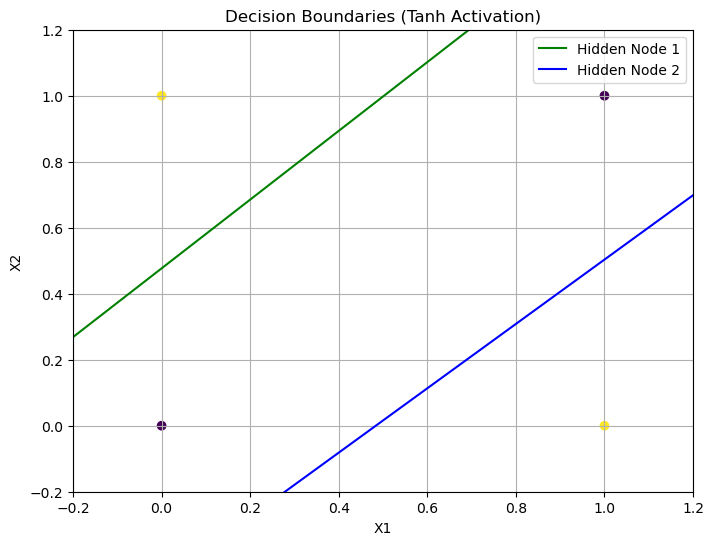

In [79]:

# Calculate decision boundary for each hidden node
hidden_m0, hidden_b0 = calc_decision_boundary(hidden_params[0])
hidden_x0, hidden_y0 = gen_boundary_points(hidden_params[0], hidden_m0, hidden_b0)
hidden_m1, hidden_b1 = calc_decision_boundary(hidden_params[1])
hidden_x1, hidden_y1 = gen_boundary_points(hidden_params[1], hidden_m1, hidden_b1)


X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

# Visualize input space and decision boundaries
plt.figure(figsize=(8, 6))
plt.title("Decision Boundaries (Tanh Activation)")
plt.plot(hidden_x0, hidden_y0, c='g', label="Hidden Node 1")
plt.plot(hidden_x1, hidden_y1, c='b', label="Hidden Node 2")
plt.scatter(X[:, 0], X[:, 1], c=y.flatten())
plt.legend()
plt.xlim([-0.2, 1.2])
plt.ylim([-0.2, 1.2])
plt.xlabel("X1")
plt.ylabel("X2")
plt.grid(True)
plt.show()
